In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [13]:
# read in data
df = pd.read_excel('results/EstMB_phenotype_data.xlsx', index_col=False)
df.tail(2)

,skood,gender,Age_at_MBsample,BMI,WHR,antibiotics,samplingSeason,BP_systolic,birthPlace_typeCity,bornByCaesereanSection_code,...,hasPets_name_mapeada,hasSpecialDietFollowing_name_mapeada,hasTakenSupplements_name_mapeada,seasonableAllergy_name_mapeada,takenRinsingMouth_name_mapeada,tonsilsRemoved_name_mapeada,conditionBowel_name_mapeada,dringingWaterAtHome_name_mapeada,frequencyGutEmpting_name_mapeada,health_status_mapeada
2507,EGVD047449,1,NaN,21.14,0.81,Not in the last year,NaN,NaN,1.0,2.0,...,Yes,No,Yes,No,No,No,I have normal bowel movements,Tap water,Once a day,I have no pain or discomfort
2508,EGVD048679,1,NaN,31.64,0.90,Not in the last year,NaN,NaN,1.0,2.0,...,Yes,No,No,No,No,No,I have normal bowel movements,Tap water,Once a day,I have no pain or discomfort


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Columns: 345 entries, Unnamed: 0 to frequencyGutEmpting_name_mapeada
dtypes: float64(52), int64(227), object(66)
memory usage: 6.6+ MB


In [4]:
# Print the names of all columns
column_names = df.columns.tolist()
print(column_names)

['Unnamed: 0', 'skood', 'gender', 'Age_at_MBsample', 'BMI', 'WHR', 'antibiotics', 'samplingSeason', 'BP_systolic', 'birthPlace_typeCity', 'bornByCaesereanSection_code', 'bornByCaesereanSection_name', 'bowelMoreInformatsion', 'cecumRemoved_code', 'cecumRemoved_name', 'chickenpox_code', 'chickenpox_name', 'conditionBowel_code', 'conditionBowel_name', 'dringingWaterAtHome_code', 'dringingWaterAtHome_name', 'foodAllergyOther', 'foodBabyFirstMonths_code', 'foodBabyFirstMonths_name', 'frequencyGutEmpting_code', 'frequencyGutEmpting_name', 'frequencyTakenBvitFolFoolacid_code', 'frequencyTakenBvitFolFoolacid_name', 'frequencyTakenDvit_code', 'frequencyTakenDvit_name', 'frequencyTakenProbiotic_code', 'frequencyTakenProbiotic_name', 'funcalDiagnosed_code', 'funcalDiagnosed_name', 'funcalDiagnosedGenital_code', 'funcalDiagnosedGenital_name', 'gumDiseaseDiagnosed_code', 'gumDiseaseDiagnosed_name', 'gumTreatmentPerformed_code', 'gumTreatmentPerformed_name', 'hasBowelMoreInformation_code', 'hasBowel

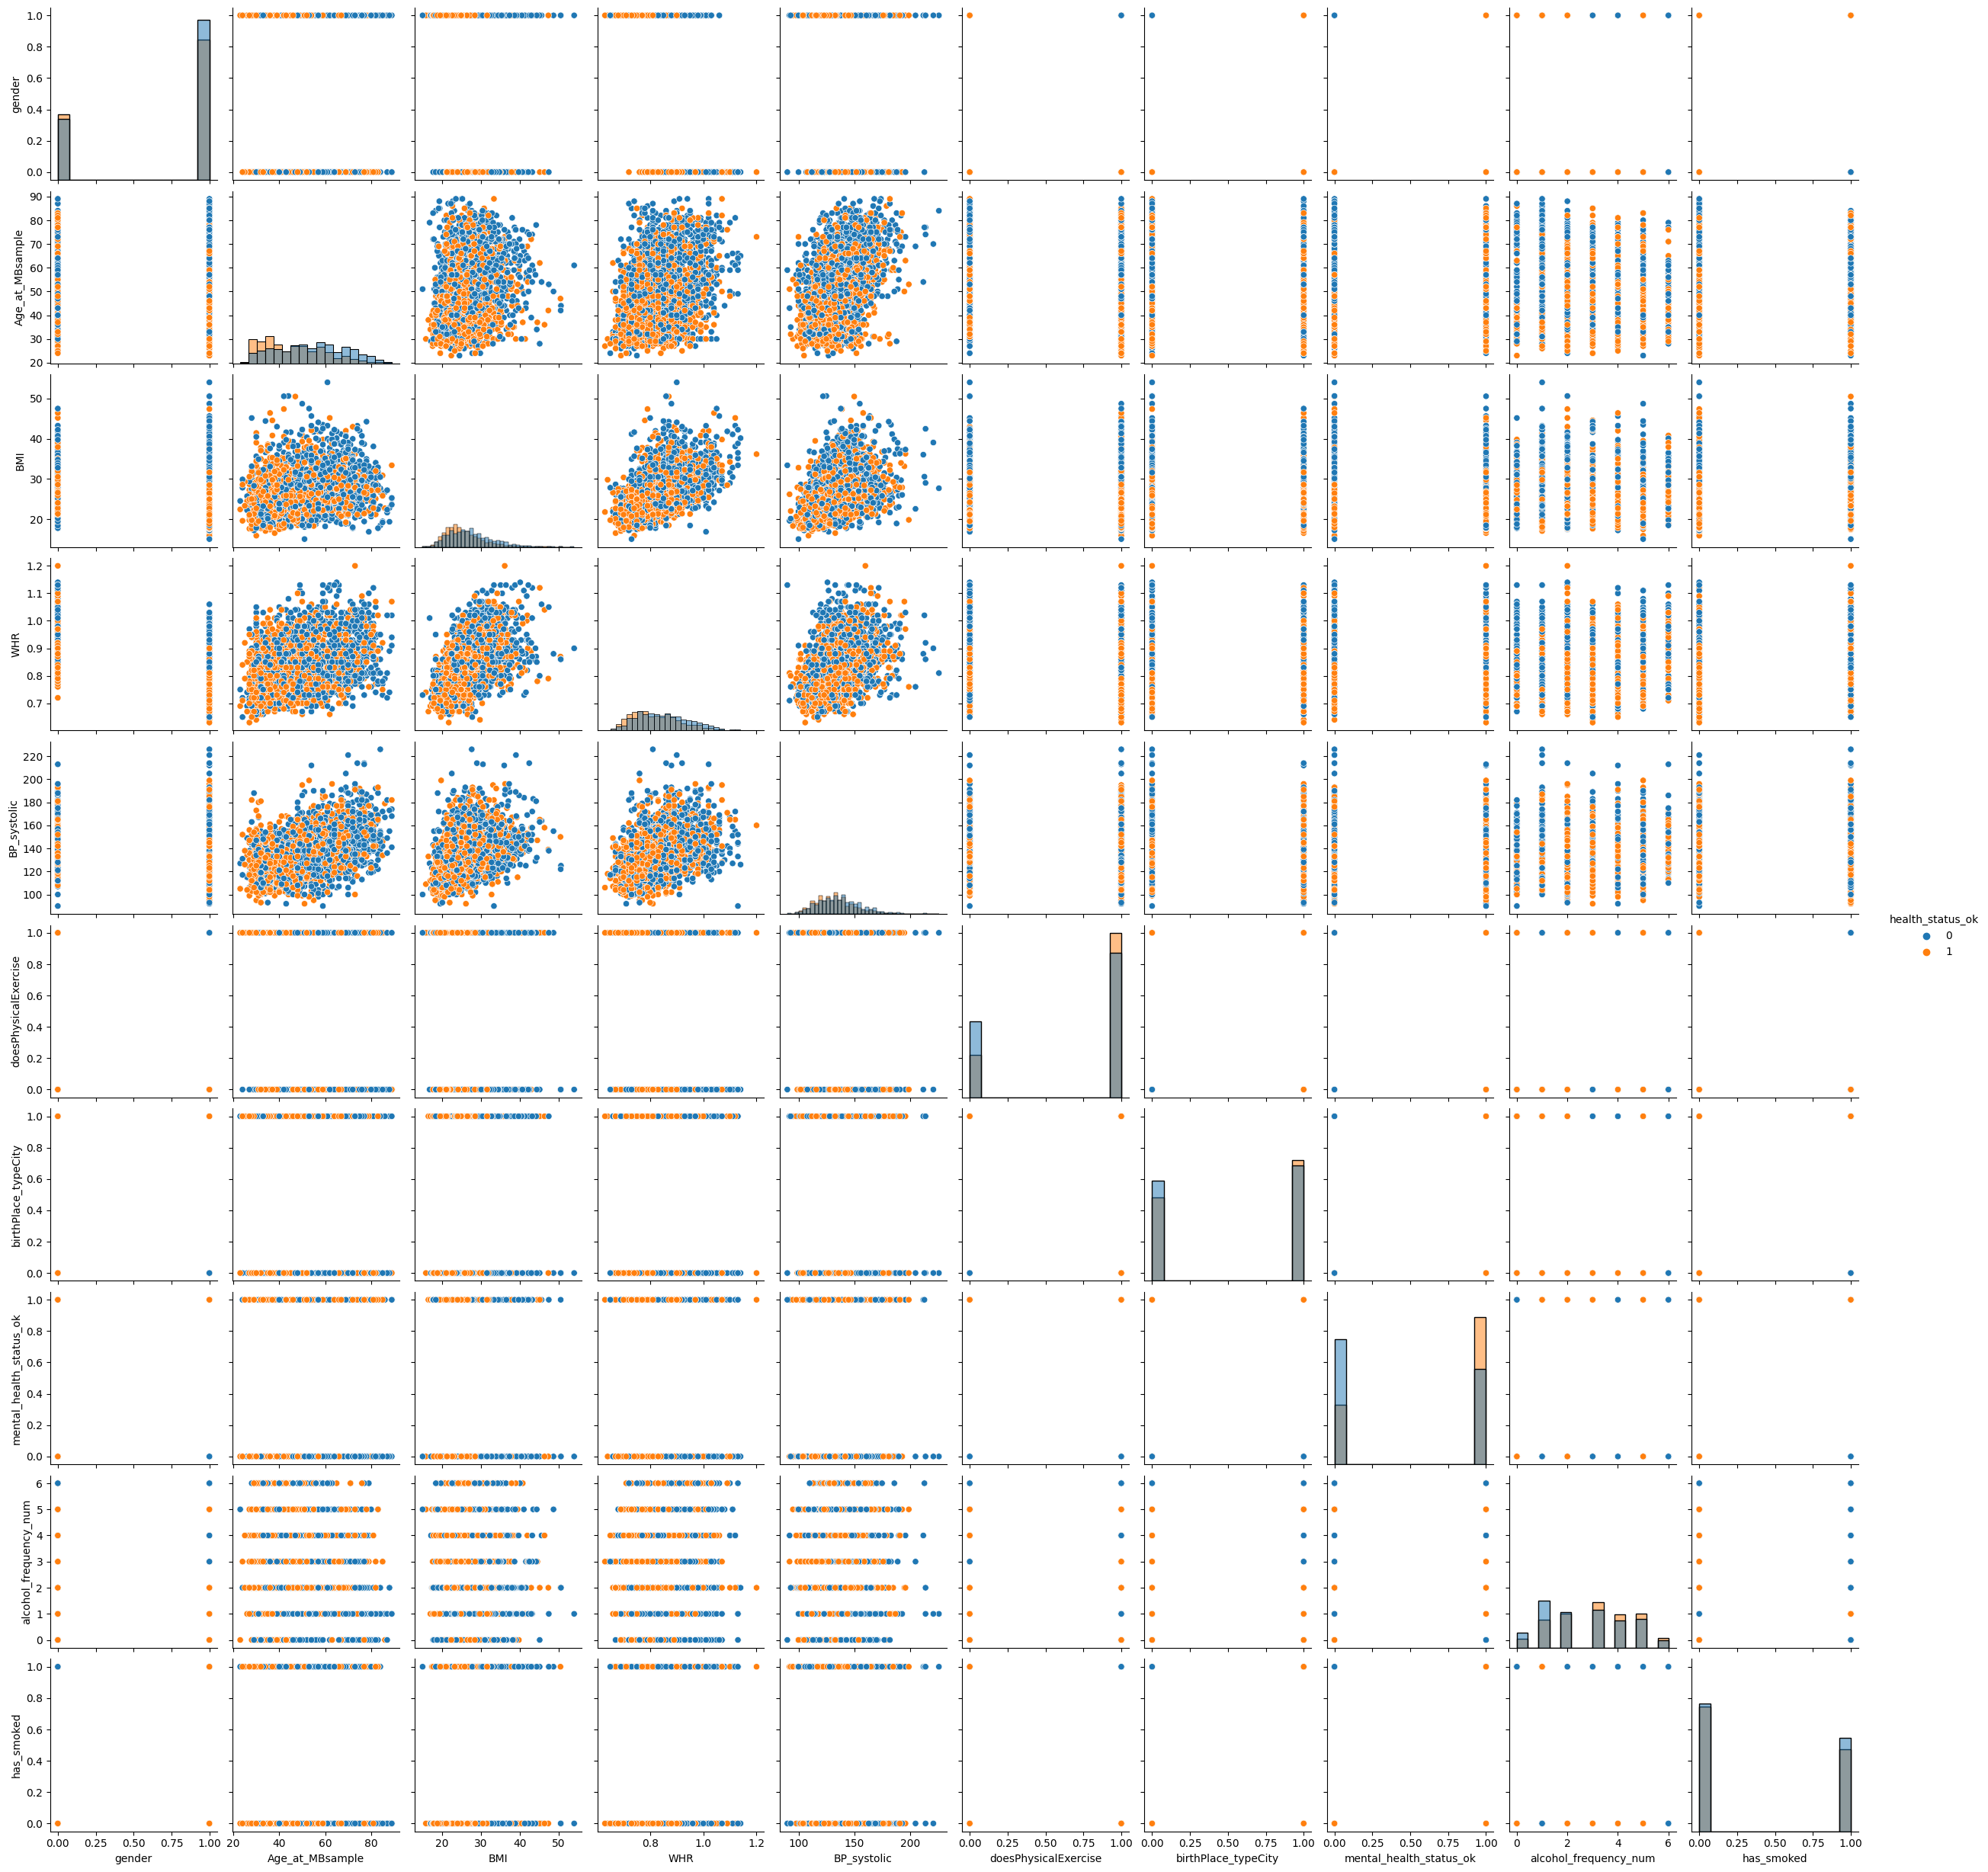

In [17]:
df1 = df[['gender', 'Age_at_MBsample', 'BMI', 'WHR', 'antibiotics', 'samplingSeason', 'BP_systolic', 'doesPhysicalExercise',
          'birthPlace_typeCity','health_status_ok', 'mental_health_status_ok', 'alcohol_frequency_num', 'has_smoked']]
sns.pairplot(df1, hue='health_status_ok', diag_kind='hist')